# A.2.5 The LBM Code (D2Q9)

In [10]:
# LBM advection-diffusion D2Q9

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

n = 100
m = 100
f = np.zeros((9,n+1,m+1), dtype=float)
feq = np.zeros(9,dtype=float)
rho = np.zeros((n+1,m+1), dtype=float)
x = np.zeros(n+1, dtype=float)
y = np.zeros(m+1,dtype=float)
w = np.zeros(9,dtype=float)

u = 1.0
v = 0.4
dt = 1.0
dx = 1.0
dy = 1.0
for i in range(1, n+1):
    x[i] = x[i-1] + dx
for j in range(1, m+1):
    y[i] = y[i-1] + dy
    
tw = 1.0
alpha = 1.0
ck = dx/dt
csq = ck*ck
omega = 1.0/(3.*alpha/(csq*dt) + 0.5)
mstep = 400
w = [4/9,1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]
density = 0.
for j in range(0,m+1):
    for i in range(0,n+1):
        for k in range(0,9):
            f[k,i,j] = w[k] * density
            if(i == 0) :
                f[k,i,j] = w[k] * tw
                
                
for kk in range(1,mstep+1):
    for j in range(0,m+1):
        for i in range(0,n+1):
            sum = 0.0
            for k in range(0,9):
                sum += f[k,i,j]   
            rho[i,j] = sum
            
    for j in range(0,m+1):
        for i in range(0,n+1):
            feq[0] = w[0]*rho[i,j]
            feq[1] = w[1]*rho[i,j]*(1. + 3.*u/ck)
            feq[2] = w[2]*rho[i,j]*(1. + 3.*v/ck)
            feq[3] = w[3]*rho[i,j]*(1. - 3.*u/ck)
            feq[4] = w[4]*rho[i,j]*(1. - 3.*v/ck)
            feq[5] = w[5]*rho[i,j]*(1. + 3.*(u+v)/ck)
            feq[6] = w[6]*rho[i,j]*(1. + 3.*(-u+v)/ck)
            feq[7] = w[7]*rho[i,j]*(1. + 3.*(-u-v)/ck)
            feq[8] = w[8]*rho[i,j]*(1. + 3.*(u-v)/ck)
            for k in range(0,9):
                f[k,i,j] = omega*feq[k] + (1.-omega)*f[k,i,j]
                
    # streaming
    for j in range(m,-1,-1):
        for i in range(0,n):
            f[2,i,j] = f[2,i,j-1]
            f[6,i,j] = f[6,i+1,j-1]
            
    for j in range(m,-1,-1):
        for i in range(n,0,-1):
            f[1,i,j] = f[1,i-1,j]
            f[5,i,j] = f[5,i-1,j-1]
            
    for j in range(0,m):
        for i in range(n,0,-1):
            f[4,i,j] = f[4,i,j+1]
            f[8,i,j] = f[8,i-1,j+1]
            
    for j in range(0,m):
        for i in range(0,n):
            f[3,i,j] = f[3,i+1,j]
            f[7,i,j] = f[7,i+1,j+1]
            
    # boundary condition
    # left boundary condition ,the temperature is given,tw
    for j in range(0,m+1):
        f[1,0,j] = w[1]*tw + w[3]*tw - f[3,0,j]
        f[5,0,j] = w[5]*tw + w[7]*tw - f[7,0,j]
        f[8,0,j] = w[8]*tw + w[6]*tw - f[6,0,j]
    
    # right boundary condition, T = 0
    for j in range(0,m+1):
        f[6,n,j] = -f[8,n,j]
        f[3,n,j] = -f[1,n,j]
        f[7,n,j] = -f[5,n,j]
        f[2,n,j] = -f[4,n,j]
        f[0,n,j] = 0.0
        
    # top boundary condition, T = 0.0
    for i in range(0,n+1):
        f[8,i,m] = -f[6,i,m]
        f[7,i,m] = -f[5,i,m]
        f[4,i,m] = -f[2,i,m]
        f[1,i,m] = -f[3,i,m]
        f[0,i,m] = 0.0
        
    # bottom boundary condition, T = 0.0
    for i in range(0,n+1):
        f[2,i,0] = -f[4,i,0]
        f[6,i,0] = -f[8,i,0]
        f[5,i,0] = -f[7,i,0]
        f[1,i,0] = -f[3,i,0]
        f[0,i,0] = 0.0
        
for j in range(0,m+1):
    for i in range(0,n+1):
        sum = 0.0
        for k in range(0,9):
            sum += f[k,i,j]   
        rho[i,j] = sum

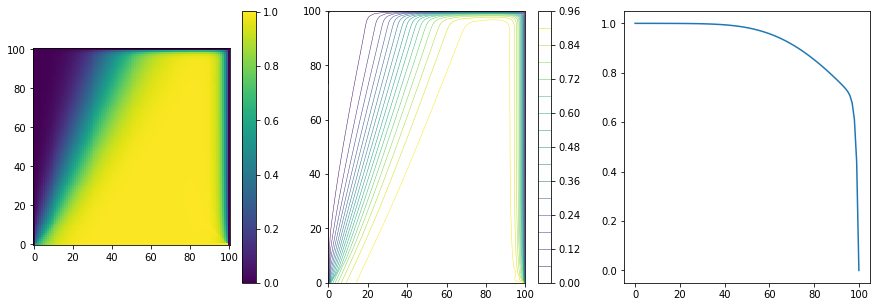

In [17]:
temp = rho[:,50]
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.plot(temp)

plt.subplot(1, 3, 2)
plt.contour(rho,16,linewidths=0.5)
plt.colorbar()

plt.subplot(1, 3, 1)
plt.imshow(rho, interpolation='nearest', origin='lower')
plt.colorbar()

plt.show()